本部分为处理数据的流程。

拿到了数据，提出一些问题
- 以年份为x轴，总的阿片数量是怎么变得，不同类别的阿片又是什么变化趋势？
- 不同合成物的占比有没有变化
# 数据的年份折线图

In [1]:
import xlrd
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import xlwt
import operator
import copy
from functools import reduce
import sklearn.cluster as sc
import re

In [2]:
def visualize(data_origin,opioids):# 原始数据，合成物字典
    k=0
    for name in opioids:
        k=k+1
        Data_Opioids=data_origin[data_origin['SubstanceName']==name]
        DataOnly_Opioids=Data_Opioids.loc[:,['YYYY','DrugReports']]
        result=DataOnly_Opioids.groupby('YYYY').sum()
        plt.plot(list(result.index),result['DrugReports'],c=randomcolor(),label=name)
        if int(result.mean())>30000:
            plt.legend()
    DataOnly_Opioids=data_origin.loc[:,['YYYY','DrugReports']]
    result=DataOnly_Opioids.groupby('YYYY').sum()
    plt.plot(list(result.index),result['DrugReports'],c=randomcolor(),label='total')
    #plt.legend()
       #print(int(result.mean()))
    
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[np.random.randint(0,14)]
    return "#"+color

In [3]:
def number_of_data(data_origin):
    '''
    计算并存储各类数据共多少类，返回字典，字典长度即数目
    '''
    county={}
    for county_i in range(24062):# ii 是从0开始的
        FIPS_Combined=data_origin.iloc[county_i][5]
        if FIPS_Combined not in county.keys():
            county[FIPS_Combined]=FIPS_Combined
            
    opioids={}
    for opioids_i in range(24062):
        SubstanceName=data_origin.iloc[opioids_i][6]
        if SubstanceName not in opioids.keys():
            opioids[SubstanceName]=SubstanceName
            
    return county,opioids

In [4]:
def init(data_origin,uscities_origin):
    '''
    将county的fips码和经纬度绑定
    '''
    county_lonAndLat={}
    for ii in range(24062):# ii 是从0开始的
        FIPS_Combined=data_origin.iloc[ii][5]
        if FIPS_Combined not in county_lonAndLat.keys():
            USAcityLonLat=uscities_origin.loc[uscities_origin.county_fips==FIPS_Combined]
            if USAcityLonLat.shape[0]!=0:
                USAcityLonLat=USAcityLonLat.reset_index(drop=True)
                lat=USAcityLonLat.iloc[0,1]
                lng=USAcityLonLat.iloc[0,2]
                county_lonAndLat[FIPS_Combined]=(lat,lng)
            else:# 失效时换用字符串匹配
                FIPS_Combined_pattern=str(FIPS_Combined)
                for j in range(33099):
                    uscities_fisp_str=str(uscities_origin.iloc[j,14])
                    if re.search(FIPS_Combined_pattern,uscities_fisp_str):
                        lat=uscities_origin.iloc[j,1]
                        lng=uscities_origin.iloc[j,2]
                        county_lonAndLat[FIPS_Combined]=(lat,lng)
                        break
    
    return county_lonAndLat

In [5]:
excel_origin=pd.ExcelFile('MCM_NFLIS_Data.xlsx')# 原始数据
data_origin=pd.read_excel(excel_origin,'Data')

UScities_excel_origin=pd.ExcelFile('uszips.xlsx')# 原始数据
uscities_origin=pd.read_excel(UScities_excel_origin,'Sheet1')

# 依年份划分数据
names=locals()
for year_i in range(8):
    names['data_201'+str(year_i)]=data_origin.iloc[:,:][data_origin.YYYY<2011+year_i]
    names['data_201'+str(year_i)]=names['data_201'+str(year_i)].iloc[:,:][data_origin.YYYY>2009+year_i]

# 将fips和合成物作为字典
county,opioids=number_of_data(data_origin)

# 将county的fips码和经纬度绑定
county_lonAndLat=init(data_origin,uscities_origin)
county_lonAndLat_Frame=(pd.DataFrame(county_lonAndLat)).T# to frame  #transpose

E:\anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


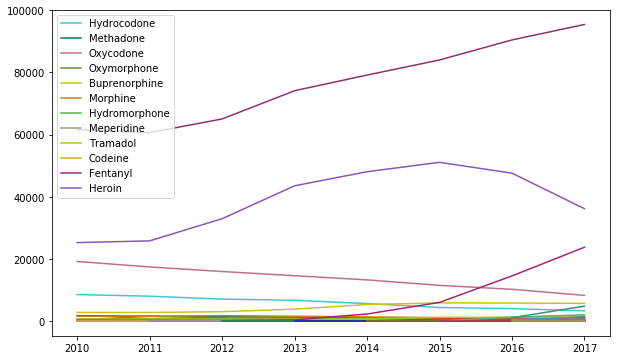

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
visualize(data_origin,opioids)

In [7]:
# 百分比显示
def visualize_per(data_origin,opioids):# 原始数据，合成物字典
    k=0
    for name in opioids:
        k=k+1
        Data_Opioids=data_origin[data_origin['SubstanceName']==name]
        DataOnly_Opioids=Data_Opioids.loc[:,['YYYY','DrugReports']]
        result=DataOnly_Opioids.groupby('YYYY').sum()
        
        DataOnly_Opioids_total=data_origin.loc[:,['YYYY','DrugReports']]
        result_total=DataOnly_Opioids_total.groupby('YYYY').sum()
    
        plt.plot(list(result.index),result['DrugReports']/result_total['DrugReports'],c=randomcolor(),label=name)
        
        if int(result.mean())>30000:
            plt.legend()
            
            
    #DataOnly_Opioids=data_origin.loc[:,['YYYY','DrugReports']]
    #result=DataOnly_Opioids.groupby('YYYY').sum()
    #plt.plot(list(result.index),result['DrugReports'],c=randomcolor(),label='total')
    #plt.legend()
       #print(int(result.mean()))
    
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[np.random.randint(0,14)]
    return "#"+color

ValueError: x and y must have same first dimension, but have shapes (6,) and (8,)

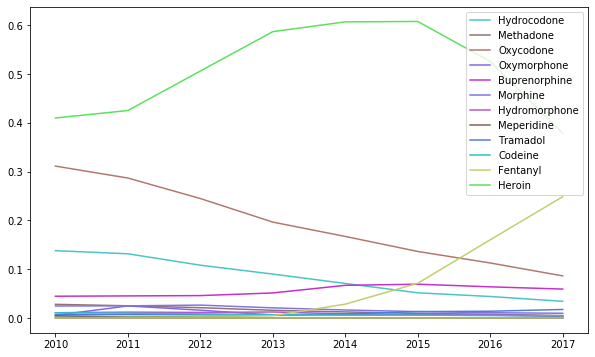

In [8]:
plt.figure(figsize=(10,6))
visualize_per(data_origin,opioids)

In [35]:
k=0
for name in opioids:
    k=k+1
    Data_Opioids=data_origin[data_origin['SubstanceName']==name]
    DataOnly_Opioids=Data_Opioids.loc[:,['YYYY','DrugReports']]
    result=DataOnly_Opioids.groupby('YYYY').sum()

    DataOnly_Opioids_total=data_origin.loc[:,['YYYY','DrugReports']]
    result_total=DataOnly_Opioids_total.groupby('YYYY').sum()
    print(result['DrugReports'])
    #plt.plot(list(result.index),result['DrugReports'],c=randomcolor(),label='total')
    #plt.plot(list(result.index),(result['DrugReports'])/(result_total.iloc[0,k-1]),c=randomcolor(),label=name)

    #if int(result.mean())>30000:
        #plt.legend()

YYYY
2010    8494
2011    7979
2012    7038
2013    6669
2014    5604
2015    4337
2016    3985
2017    3264
Name: DrugReports, dtype: int64
YYYY
2010    1721
2011    1516
2012    1371
2013    1167
2014     981
2015     785
2016     700
2017     472
Name: DrugReports, dtype: int64
YYYY
2010    19162
2011    17392
2012    15922
2013    14567
2014    13232
2015    11459
2016    10202
2017     8237
Name: DrugReports, dtype: int64
YYYY
2010     344
2011    1496
2012    1038
2013     452
2014     535
2015     565
2016     543
2017     390
Name: DrugReports, dtype: int64
YYYY
2010    2745
2011    2743
2012    2985
2013    3806
2014    5302
2015    5821
2016    5778
2017    5659
Name: DrugReports, dtype: int64
YYYY
2010    1513
2011    1511
2012    1717
2013    1539
2014    1296
2015    1101
2016     982
2017     923
Name: DrugReports, dtype: int64
YYYY
2010    665
2011    726
2012    739
2013    911
2014    675
2015    569
2016    526
2017    312
Name: DrugReports, dtype: int64
YYYY
2010    

In [33]:
list(result.index)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]